In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as no
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# 1 Data Loading and Cleaning

In [2]:
data = pd.read_csv("c_0000.csv")
data.head()
#Initial conditions. Col. 1, 2, 3: positions of stars; 4, 5, 6: velocities; 7: masses; 8: ids.

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5


In [3]:
data.describe(include='all')

,x,y,z,vx,vy,vz,m,id
count,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,64000.000000
mean,-1.176595e-10,3.412734e-10,2.464757e-10,1.101956e-10,2.103394e-10,1.820625e-11,1.562500e-05,32000.500000
std,7.807475e-01,7.814718e-01,7.719907e-01,4.088337e-01,4.078873e-01,4.080323e-01,6.776317e-21,18475.352951
min,-4.698981e+00,-5.095714e+00,-5.015129e+00,-1.619203e+00,-1.482613e+00,-1.685246e+00,1.562500e-05,1.000000
25%,-3.348222e-01,-3.366134e-01,-3.356278e-01,-2.697400e-01,-2.714544e-01,-2.709821e-01,1.562500e-05,16000.750000
50%,-4.818202e-04,-4.321573e-04,-3.949339e-03,-2.090700e-04,1.419134e-03,1.770830e-04,1.562500e-05,32000.500000
75%,3.347058e-01,3.321014e-01,3.305091e-01,2.691137e-01,2.707544e-01,2.700553e-01,1.562500e-05,48000.250000
max,5.401047e+00,5.680950e+00,4.762590e+00,1.547319e+00,1.584202e+00,1.600681e+00,1.562500e-05,64000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
 7   id      64000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


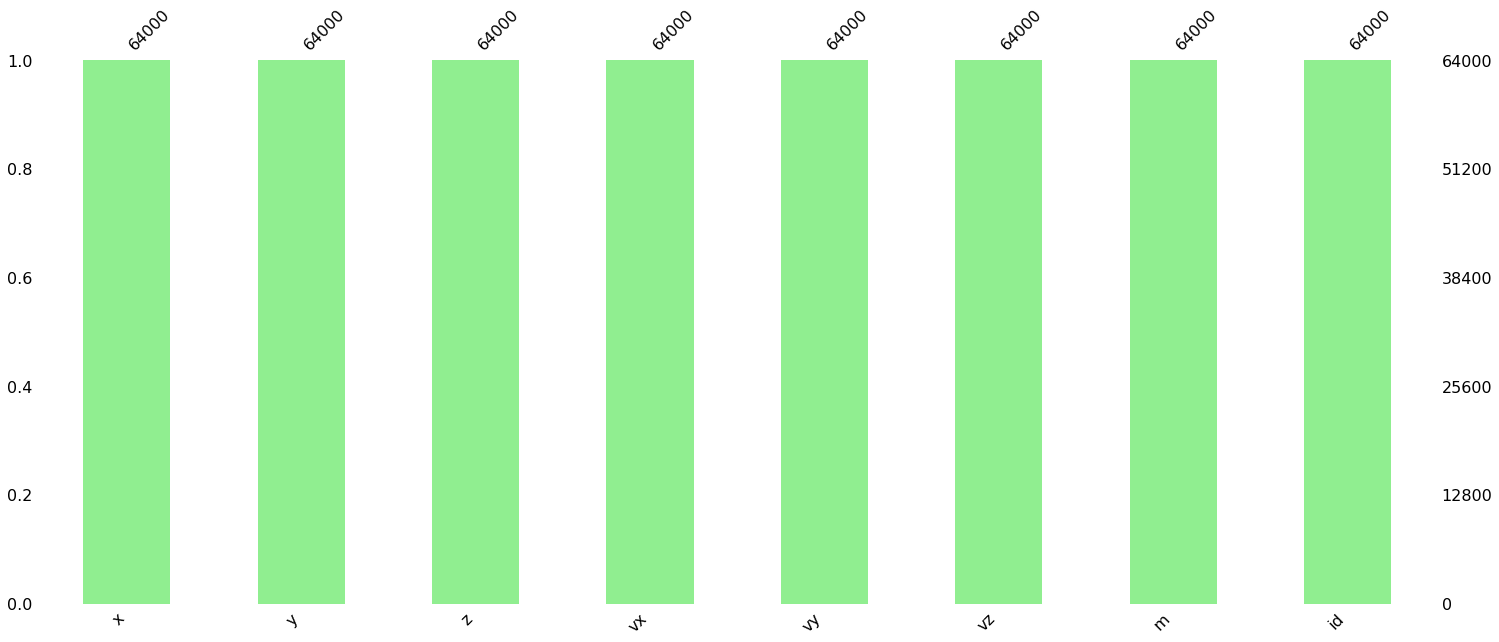

In [5]:
no.bar(data, color='lightgreen')

In [6]:
for col in data.columns:
    print(data[col].value_counts())
    print("-" * 40)

-0.072751    2
 0.250938    2
 0.648572    2
-0.145429    2
 0.290768    2
            ..
 0.105593    1
 0.331653    1
 0.259145    1
-0.970879    1
-0.158667    1
Name: x, Length: 63983, dtype: int64
----------------------------------------
 0.180635    2
-0.805521    2
 0.602452    2
-1.101233    2
-0.118022    2
            ..
 0.095229    1
-0.267707    1
 0.074771    1
-0.205342    1
-1.150932    1
Name: y, Length: 63983, dtype: int64
----------------------------------------
-0.156273    2
 0.082391    2
 0.077121    2
 0.879924    2
 1.602714    2
            ..
-0.092079    1
-0.448164    1
 0.213900    1
 0.325593    1
 0.237001    1
Name: z, Length: 63977, dtype: int64
----------------------------------------
 0.082151    2
-0.502021    2
 0.402853    2
 0.264670    2
 0.136065    2
            ..
 0.364801    1
 0.249503    1
-0.018070    1
-0.130466    1
-0.396418    1
Name: vx, Length: 63973, dtype: int64
----------------------------------------
 0.015317    2
 0.253893   

# 2 Data Visualisation

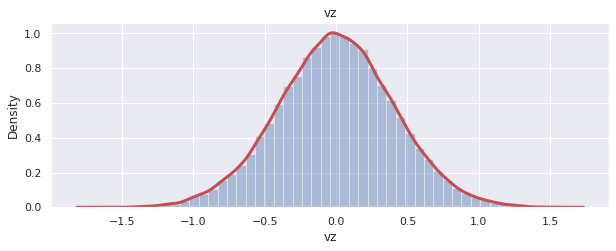

In [7]:
df1 = data.copy()
df1 = df1.drop(columns=['id',"m"])
for i in range(len(df1.columns)):
  plt.figure(figsize=(10,40)) # figure ration 16:9
  sns.set()
  plt.subplot(10, 1, i+1)
  sns.distplot(df1[df1.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
  plt.title(df1.columns[i])

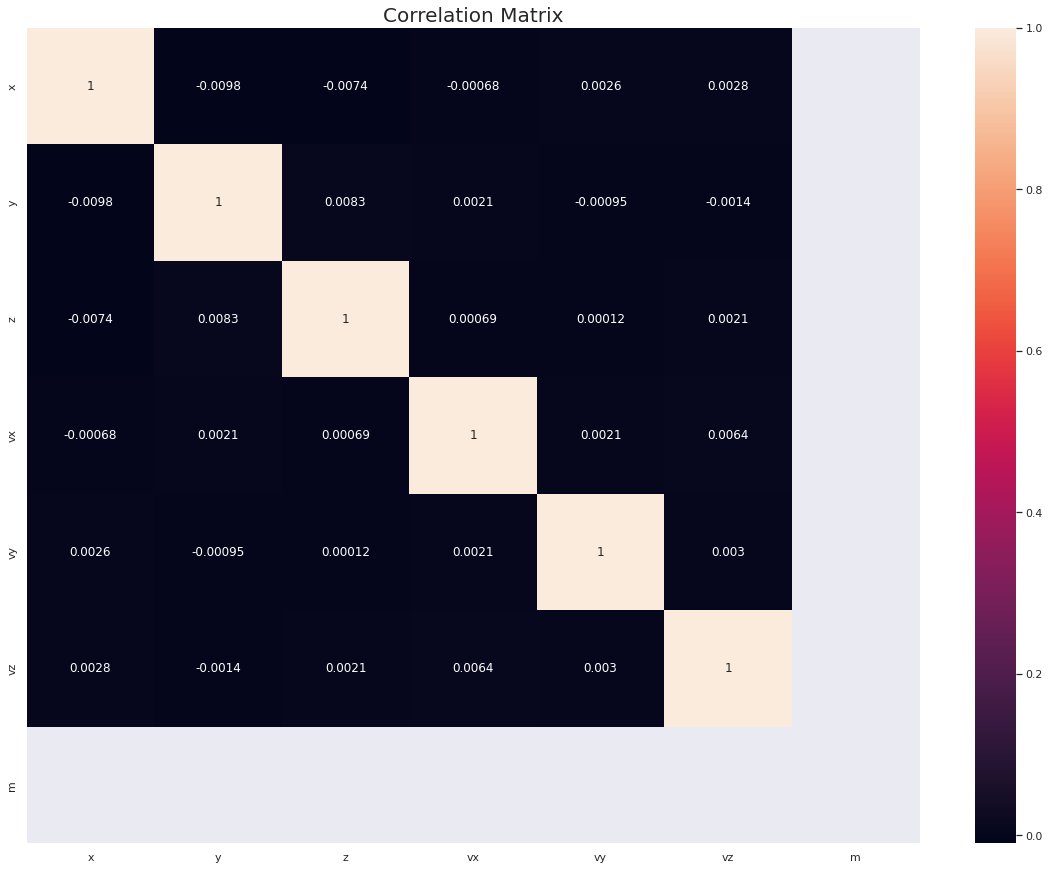

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data[['x','y','z','vx','vy','vz','m']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

There is no correlation between those value, actually they each line represent a coordinate for a star and her velocity

With our parameters we can explore some physics term like the time, distance

In [9]:
df = data.copy()
df['t'] = 0
df['v'] = np.sqrt(df.vx**2 + df.vy**2 + df.vz**2)
df['Ec'] = 0.5*data.m*(df.v)**2
df['r'] = np.sqrt(df.x**2 + df.y**2 + df.z**2)

In [10]:
for i in range(1,19):
    if i<10:
        step="0"+str(i)
    else:
        step=str(i)
    file="c_"+step+"00.csv"
    d=pd.read_csv(file)
    d['t']=i*100
    d['v'] = np.sqrt(d.vx**2 + d.vy**2 + d.vz**2)
    d['Ec'] = 0.5*d.m*(d.v)**2
    d['r'] = np.sqrt(d.x**2 + d.y**2 + d.z**2)
    df=df.append(d)

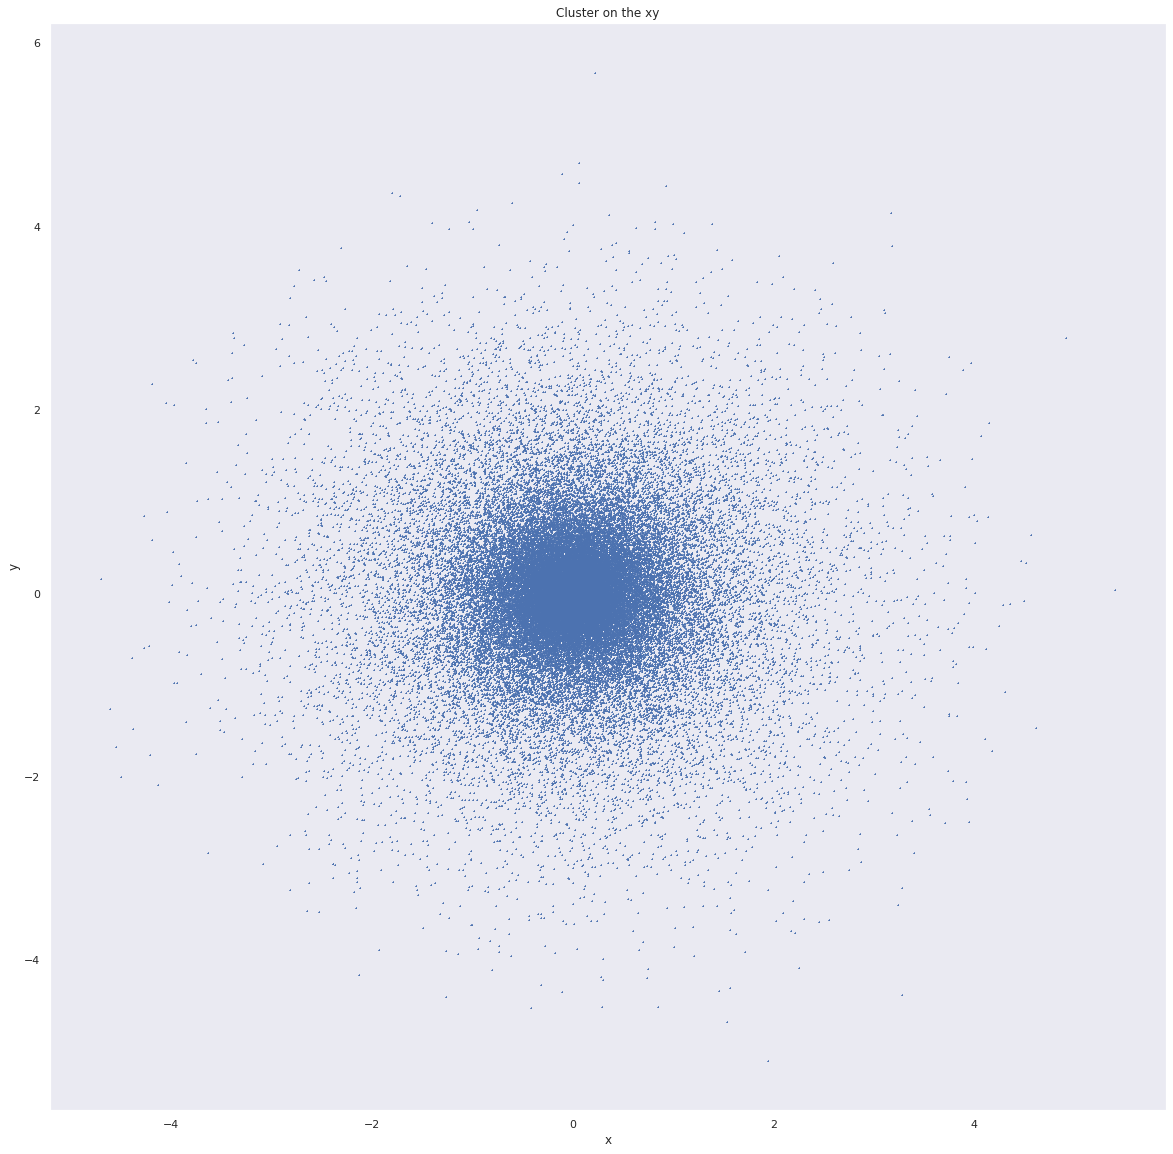

In [11]:
plt.figure(figsize=(20,20))
plt.scatter(df[df.t==0].x,df[df.t==0].y,s=1,marker='+')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster on the xy')
plt.grid()
plt.show()

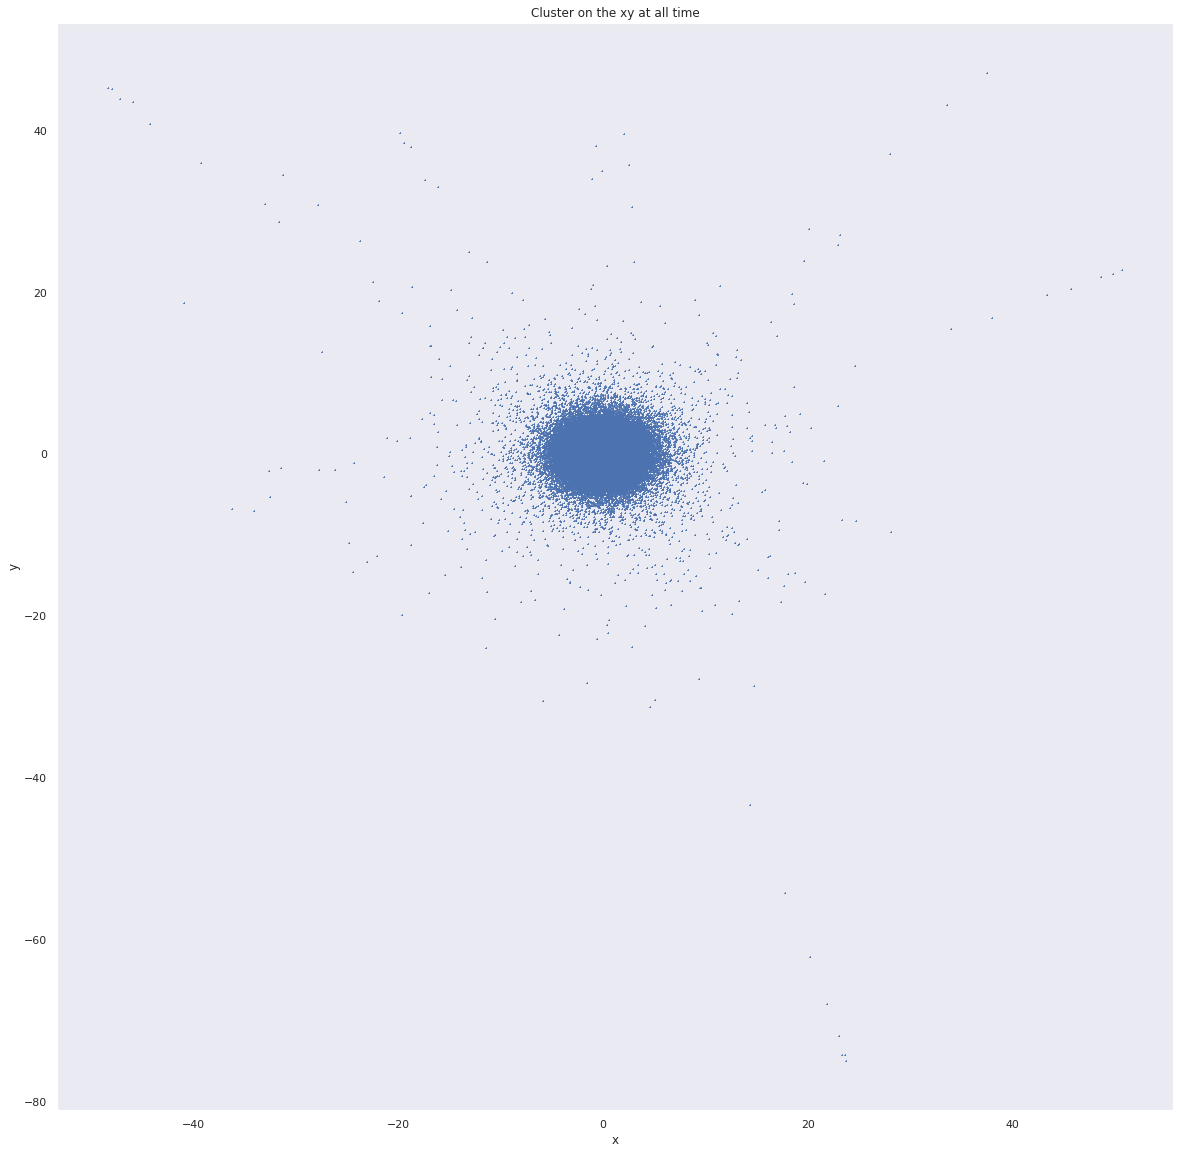

In [12]:
plt.figure(figsize=(20,20))
plt.scatter(df.x,df.y,s=1,marker='+')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster on the xy at all time')
plt.grid()
plt.show()

We can see that some stars are actually leaving our plan.We could actually perform In order to correctly use our cluster method we will use only our data at time 0. 

In [13]:
df_2 = pd.read_csv("c_1500.csv")

# 3 Clustering

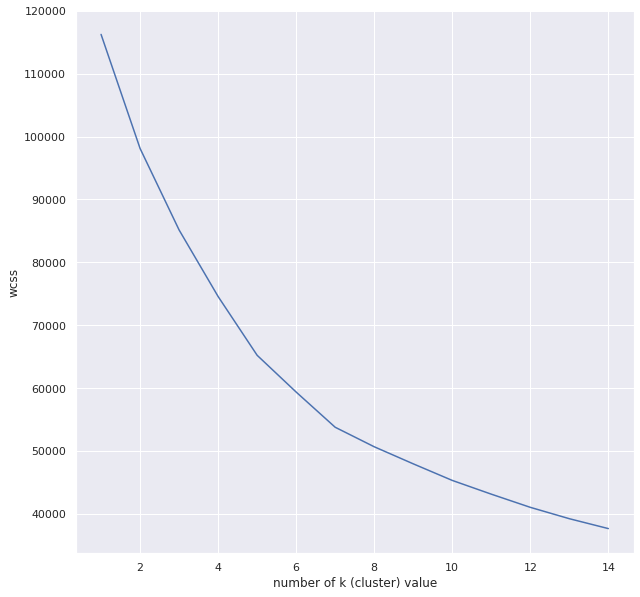

In [46]:
from sklearn.cluster import  KMeans
wcss = []

data2 = data.iloc[:,[0,1,2]]

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_) # inertia means that find to value of wcss

plt.figure(figsize=(10,10))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

It looks that 4 has an elbow point.

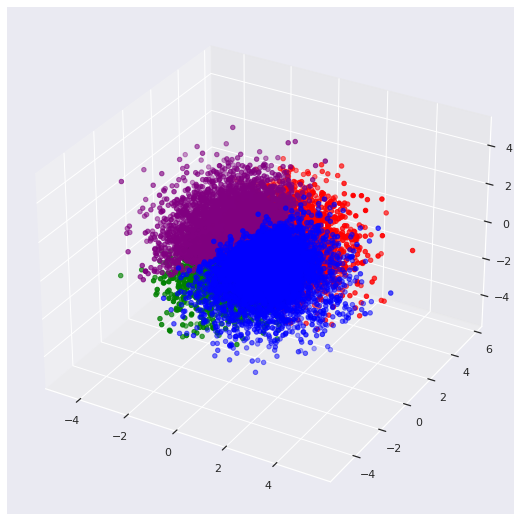

In [49]:
kmean2 = KMeans(n_clusters=4)
clusters = kmean2.fit_predict(data2)

data2["label"] = clusters
plt.figure(figsize=(10,10))
fig3 = plt.figure(figsize=(20,10))
ax = fig3.add_subplot(121, projection='3d')
ax.scatter(data2.x[data2.label == 0], data2.y[data2.label == 0],data2.z[data2.label== 0], color="red")
ax.scatter(data2.x[data2.label == 1], data2.y[data2.label == 1],data2.z[data2.label== 1],  color="blue")
ax.scatter(data2.x[data2.label == 2], data2.y[data2.label == 2],data2.z[data2.label== 2],  color="green")
ax.scatter(data2.x[data2.label == 3], data2.y[data2.label == 3],data2.z[data2.label== 3],  color="purple")

ax.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler


With the 3D reprensatation it's kinda hard to see everything so we use multiple angle

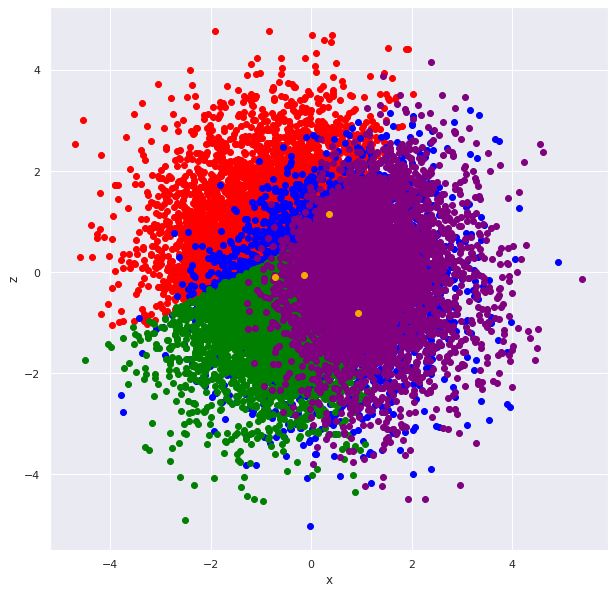

In [61]:
kmean2 = KMeans(n_clusters=4)
clusters = kmean2.fit_predict(data2)

data2["label"] = clusters
plt.figure(figsize=(10,10))
plt.scatter(data2.x[data2.label == 0], data2.y[data2.label == 0], color="red")
plt.scatter(data2.x[data2.label == 1], data2.y[data2.label == 1], color="blue")
plt.scatter(data2.x[data2.label == 2], data2.y[data2.label == 2], color="green")
plt.scatter(data2.x[data2.label == 3], data2.y[data2.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(data2.y[data2.label == 0], data2.z[data2.label == 0], color="red")
plt.scatter(data2.y[data2.label == 1], data2.z[data2.label == 1], color="blue")
plt.scatter(data2.y[data2.label == 2], data2.z[data2.label == 2], color="green")
plt.scatter(data2.y[data2.label == 3], data2.z[data2.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler
plt.xlabel("y")
plt.ylabel("z")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(data2.x[data2.label == 0], data2.z[data2.label == 0], color="red")
plt.scatter(data2.x[data2.label == 1], data2.z[data2.label == 1], color="blue")
plt.scatter(data2.x[data2.label == 2], data2.z[data2.label == 2], color="green")
plt.scatter(data2.x[data2.label == 3], data2.z[data2.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler
plt.xlabel("x")
plt.ylabel("z")
plt.show()

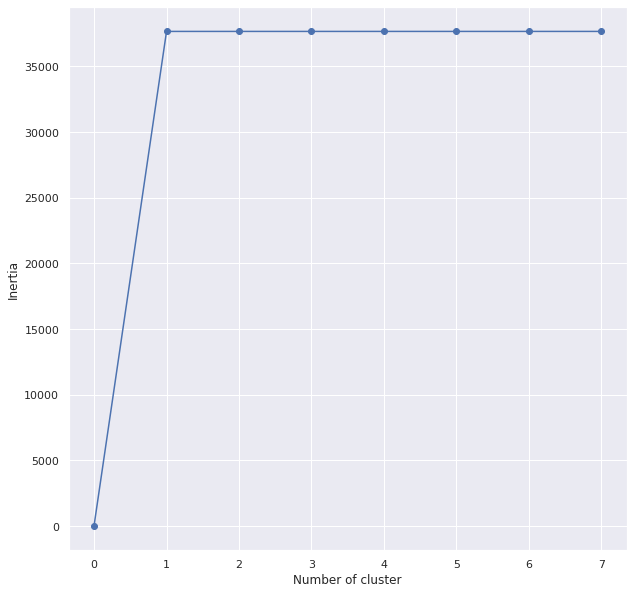

In [51]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.figure(figsize=(10,10))
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [34]:
data3 = data2.iloc[:,data2.columns != 'label'].head(5000)

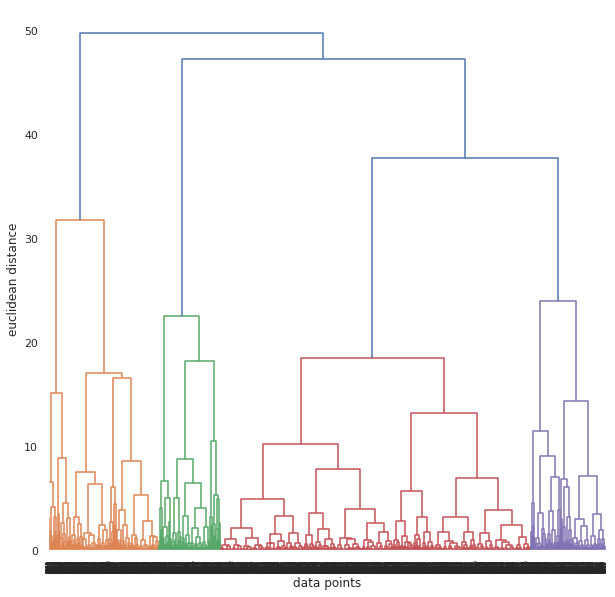

In [22]:
# dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10,10))
merg = linkage(data3, method="ward") # scipy is an algorithm of hiyerarchal clusturing
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

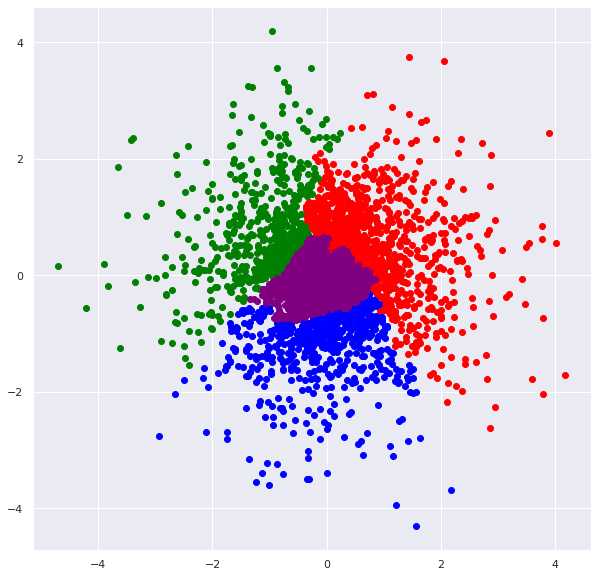

In [33]:
# HC
from sklearn.cluster import AgglomerativeClustering



hiyerartical_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(data3)

data3["label"] = cluster
plt.figure(figsize=(10,10))
plt.scatter(data3.x[data3.label == 0], data3.y[data3.label == 0], color="red")
plt.scatter(data3.x[data3.label == 1], data3.y[data3.label == 1], color="blue")
plt.scatter(data3.x[data3.label == 2], data3.y[data3.label == 2], color="green")
plt.scatter(data3.x[data3.label == 3], data3.y[data3.label == 3], color="purple")

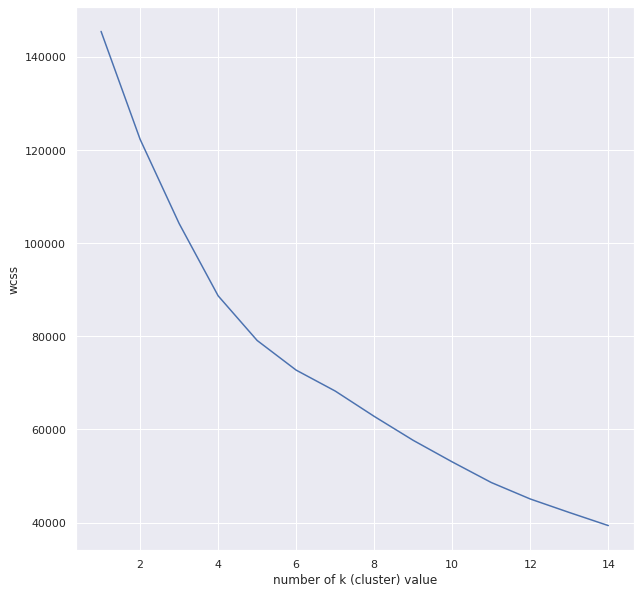

In [28]:
from sklearn.cluster import  KMeans
wcss = []

df_22 = df_2.iloc[:,[0,1]]

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_22)
    wcss.append(kmeans.inertia_) # inertia means that find to value of wcss

plt.figure(figsize=(10,10))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

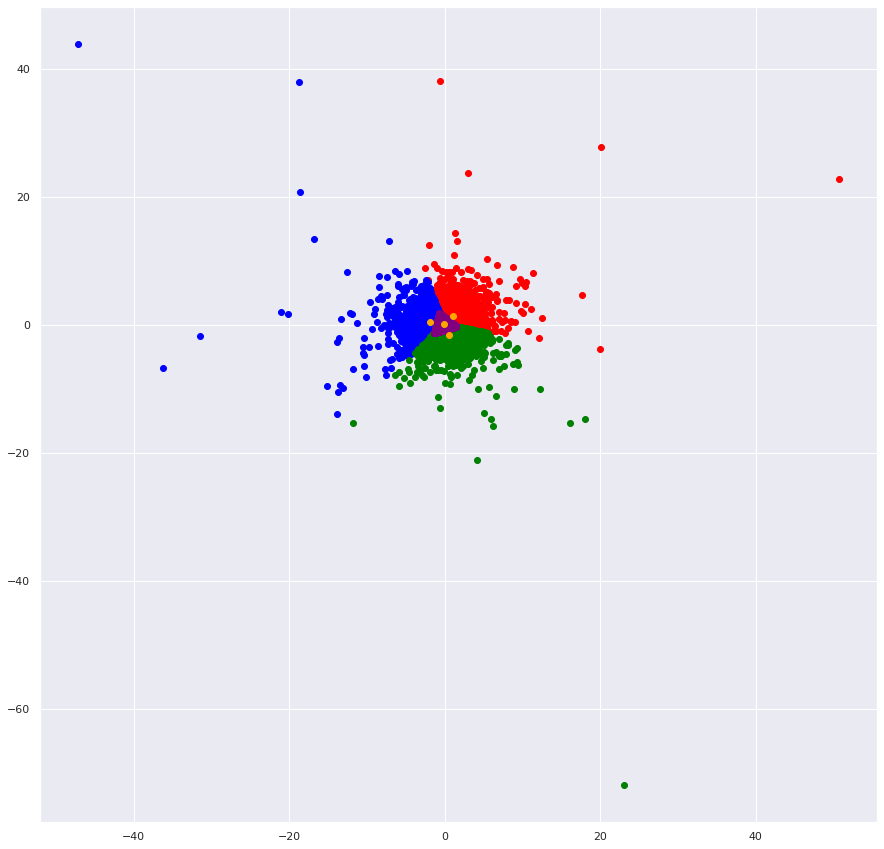

In [32]:
kmean2 = KMeans(n_clusters=4)
clusters = kmean2.fit_predict(df_22)

df_22["label"] = clusters
plt.figure(figsize=(15,15))
plt.scatter(df_22.x[df_22.label == 0], df_22.y[df_22.label == 0], color="red")
plt.scatter(df_22.x[df_22.label == 1], df_22.y[df_22.label == 1], color="blue")
plt.scatter(df_22.x[df_22.label == 2], df_22.y[df_22.label == 2], color="green")
plt.scatter(df_22.x[df_22.label == 3], df_22.y[df_22.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler

plt.show()

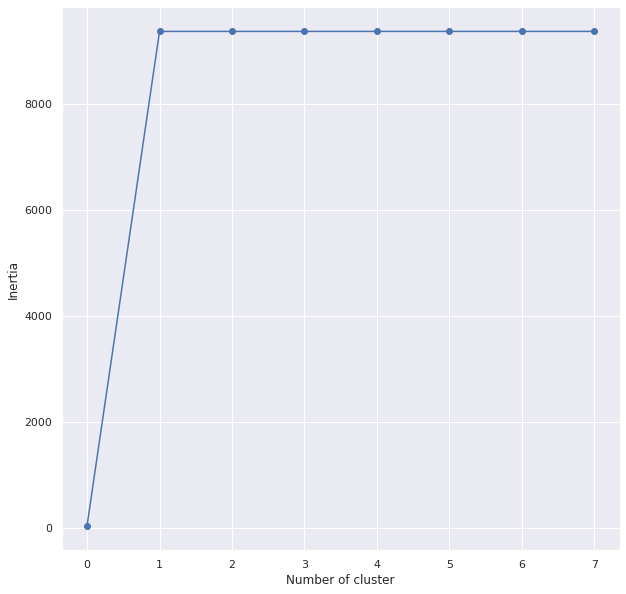

In [20]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(df_22)
    inertia_list[i] = kmeans.inertia_
plt.figure(figsize=(10,10))
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [40]:
df_3 = df_22.iloc[:,df_22.columns != 'label'].head(5000)

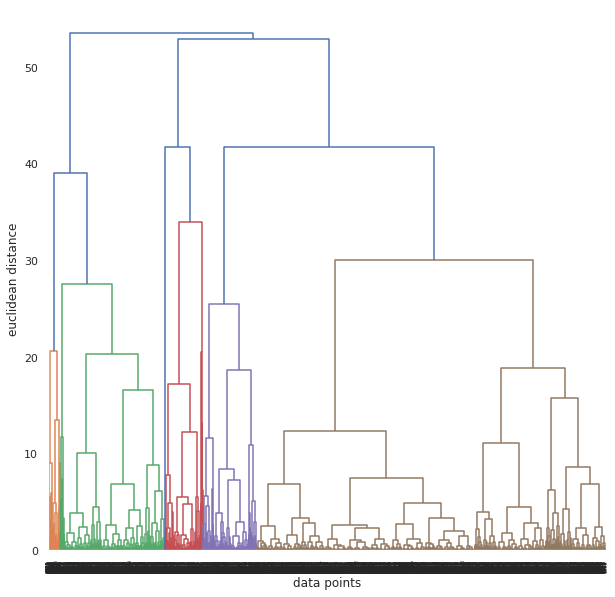

In [42]:
# dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10,10))
merg = linkage(df_3, method="ward") # scipy is an algorithm of hiyerarchal clusturing
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

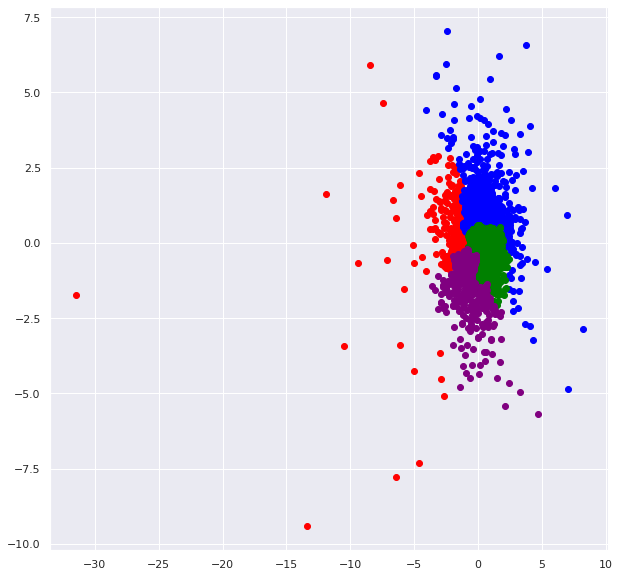

In [43]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(df_3)

df_3["label"] = cluster
plt.figure(figsize=(10,10))
plt.scatter(df_3.x[df_3.label == 0], df_3.y[df_3.label == 0], color="red")
plt.scatter(df_3.x[df_3.label == 1], df_3.y[df_3.label == 1], color="blue")
plt.scatter(df_3.x[df_3.label == 2], df_3.y[df_3.label == 2], color="green")
plt.scatter(df_3.x[df_3.label == 3], df_3.y[df_3.label == 3], color="purple")